<a href="https://colab.research.google.com/github/ganinurfadli/Data-Preparation/blob/master/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SETUP**

In [0]:
# Import relevant modules
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

**Load Data**

In [21]:
# Download data using URL then save as "data.csv"
URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQwPxotnLsgXuZt6tIXlAANttT3pxhP4ph0FhSjwvGUXfGKcnFRiqJORQg_9lBC77AH7QaxYypQ24nX/pub?output=csv"
dataset_path = keras.utils.get_file("data.csv", URL)
dataset_path

'/root/.keras/datasets/data.csv'

In [22]:
# Read data that had been dowloaded
dataframe = pd.read_csv(dataset_path)
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In [23]:
dataframe.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,111.000,1.159,2.439,1.389,1.726,5.623,1.176,1.256,7.673,158.70,103.000,2.891,5.198,2.454,1.114,4.239,25.450,26.40,166.10,2027.0,141.000,2.113,4.107,2.216,206.000,7.115
565,926682,M,20.13,28.25,131.20,1261.0,978.000,1.034,144.000,9.791,1.752,5.533,7.655,2.463,5.203,99.04,5.769,2.423,395.000,1.678,1.898,2.498,23.690,38.25,155.00,1731.0,1.166,1.922,3.215,1.628,2.572,6.637
566,926954,M,16.60,28.08,108.30,858.1,8.455,1.023,9.251,5.302,159.000,5.648,4.564,1.075,3.425,48.55,5.903,3.731,473.000,1.557,1.318,3.892,18.980,34.12,126.70,1124.0,1.139,3.094,3.403,1.418,2.218,782.000
567,927241,M,20.60,29.33,140.10,1265.0,1.178,277.000,3.514,152.000,2.397,7.016,726.000,1.595,5.772,86.22,6.522,6.158,7.117,1.664,2.324,6.185,25.740,39.42,184.60,1821.0,165.000,8.681,9.387,265.000,4.087,124.000
568,92751,B,7.76,24.54,47.92,181.0,5.263,4.362,0.000,0.000,1.587,5.884,3.857,1.428,2.548,19.15,7.189,466.000,0.000,0.000,2.676,2.783,9.456,30.37,59.16,268.6,8.996,6.444,0.000,0.000,2.871,7.039


In [24]:
dataframe.shape

(569, 32)

In [25]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000,869218.000,906024.000,8813129.000,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981,11.700,13.370,15.780,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710,16.170,18.840,21.800,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790,75.170,86.240,104.100,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500,420.300,551.100,782.700,2.501000e+03
smoothness_mean,569.0,5.341826e+01,1.926915e+02,0.100,1.137,8.293,9.383,9.970000e+02
compactness_mean,569.0,2.888633e+01,1.175107e+02,0.060,1.436,4.458,7.542,9.580000e+02
concavity_mean,569.0,4.097464e+01,1.421316e+02,0.000,1.684,3.136,6.181,9.730000e+02
concave points_mean,569.0,3.605837e+01,1.231096e+02,0.000,1.967,3.515,7.583,9.740000e+02
symmetry_mean,569.0,1.843283e+01,5.338875e+01,0.180,1.632,1.813,2.035,3.040000e+02


In [26]:
dataframe.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [27]:
dataframe['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

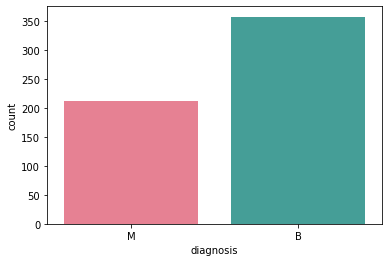

In [28]:
sns.countplot(dataframe['diagnosis'], palette='husl')

In [29]:
# y includes our labels and x includes our features
y = dataframe.diagnosis                          # M or B 
list = ['id','diagnosis']
x = dataframe.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In [31]:
dataframe['diagnosis'] = dataframe['diagnosis'].map({'M':1,'B':0})
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,1,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,1,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,1,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,1,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In [32]:
dataframe.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## **Visualization**

Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

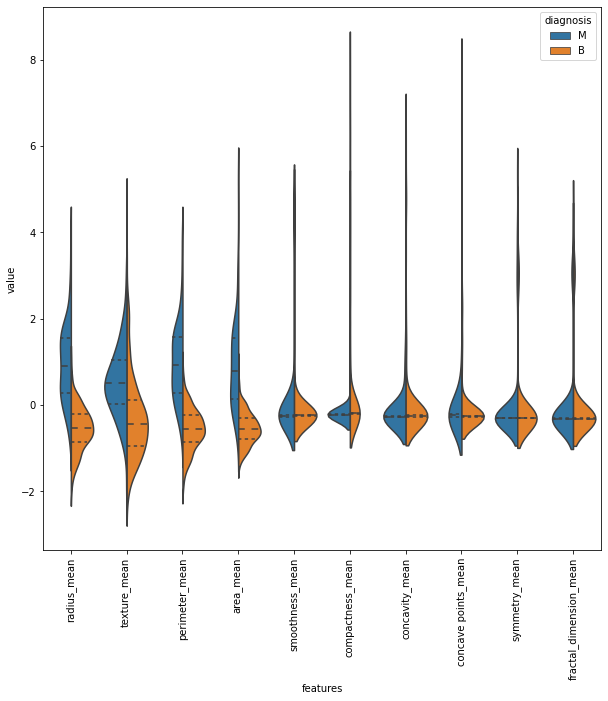

In [33]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

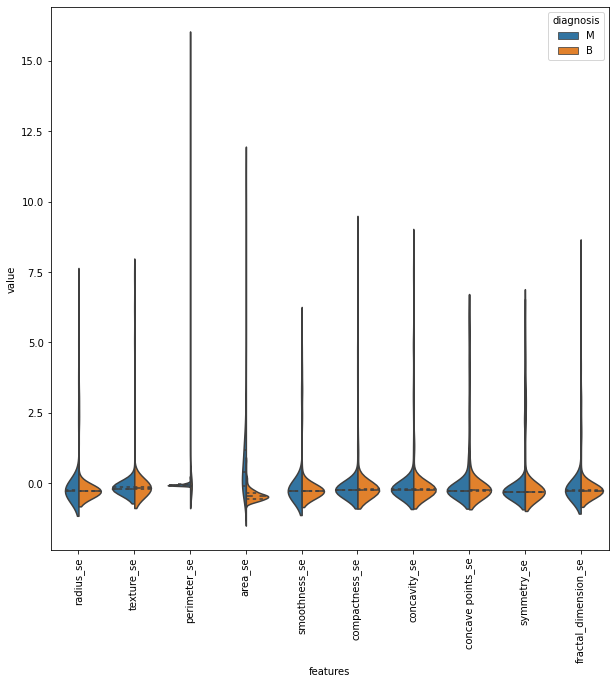

In [34]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

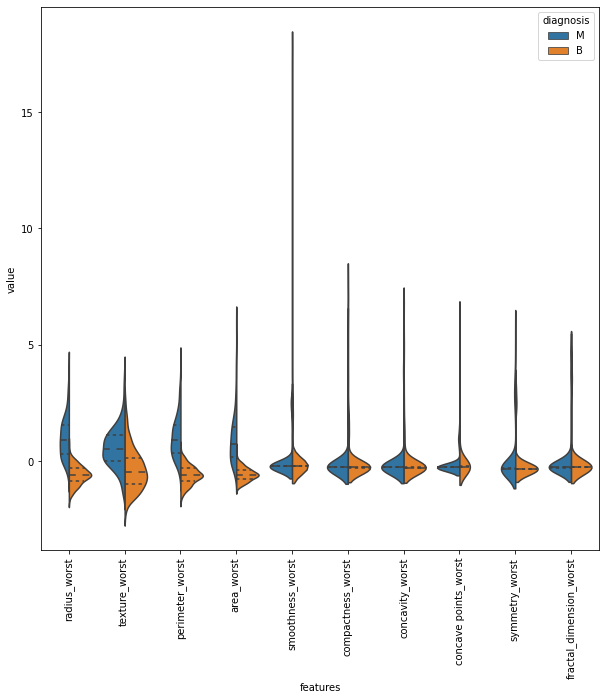

In [35]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In swarm plot, I will do part like violin plot not to make plot very complex appearance

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

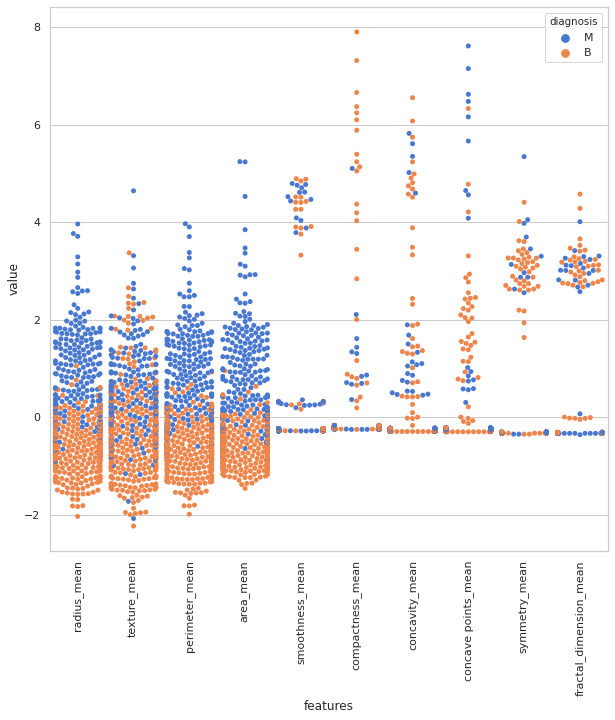

In [36]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

## **Selection Feature**

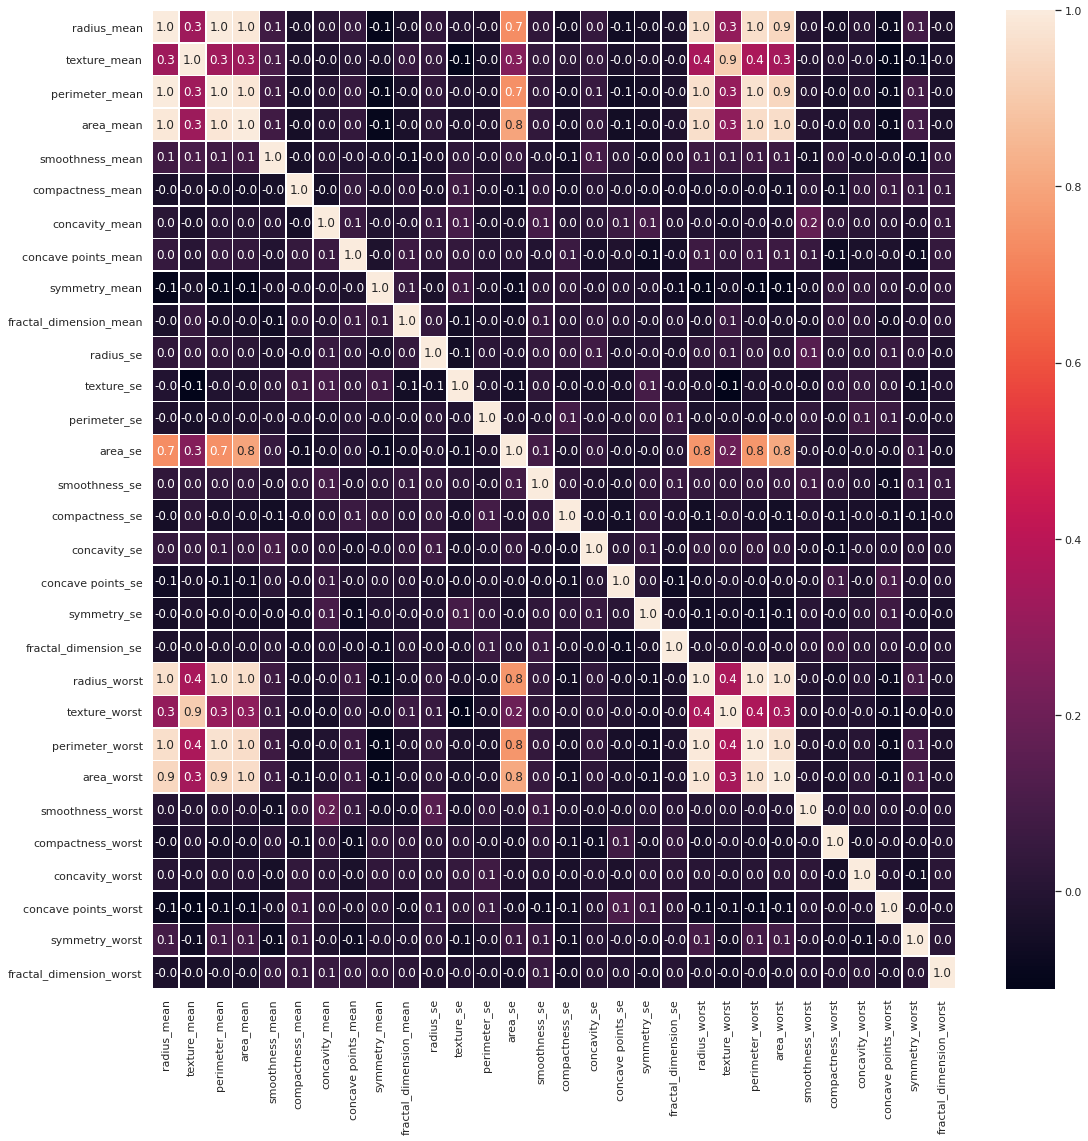

In [37]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [38]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,1.184,3.001,2.419,7.871,9.053,153.40,6.399,5.373,3.003,6.193,1.622,7.119,4.601,1.189
1,17.77,1326.0,8.474,869.000,1.812,5.667,7.339,74.08,5.225,186.000,1.389,3.532,1.238,2.416,275.000,8.902
2,21.25,1203.0,1.096,1.974,2.069,5.999,7.869,94.03,615.000,3.832,225.000,4.571,1.444,4.504,3.613,8.758
3,20.38,386.1,1.425,2.414,2.597,9.744,1.156,27.23,911.000,5.661,5.963,9.208,2.098,6.869,6.638,173.000
4,14.34,1297.0,1.003,198.000,1.809,5.883,7.813,94.44,1.149,5.688,1.756,5.115,1.374,0.400,2.364,7.678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features.

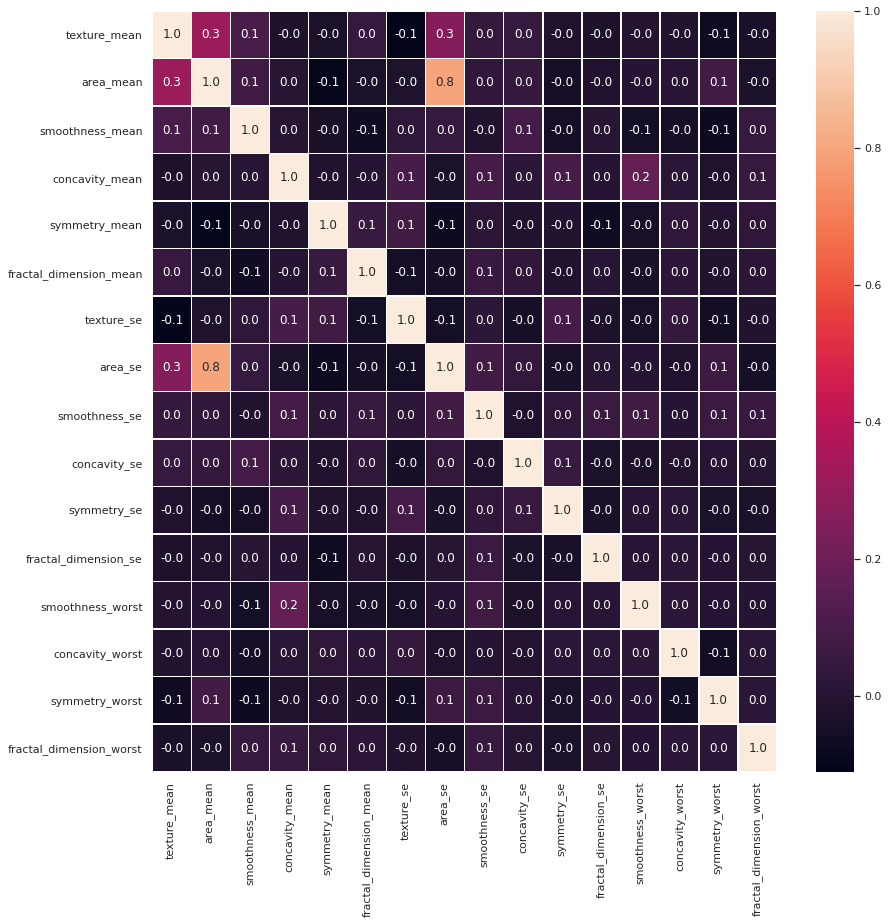

In [39]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Feature that used**

In [40]:
x_1.head()
x_1.shape 
x_1.columns 

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')